In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split


## NADILA IMAARAH D4 SAINS DATA TERAPAN A

## SOAL NOMOR 1

In [82]:
df_california = pd.read_csv('california_dataset.csv')
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 1A).MEMBAGI DATA

In [83]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split


train_clfr, test_clfr = train_test_split(df_california, test_size=0.2, random_state=42)

X_train = train_clfr.drop(columns=['house_price'])
y_train = train_clfr['house_price']

# Memisahkan fitur (X) dan label (y) untuk data uji
X_test = test_clfr.drop(columns=['house_price'])
y_test = test_clfr['house_price']

# Menampilkan ukuran dataset setelah pembagian
print("Ukuran Data Latih:", train_clfr.shape)
print("Ukuran Data Uji:", test_clfr.shape)
print("Ukuran Fitur X_train:", X_train.shape)
print("Ukuran Label y_train:", y_train.shape)
print("Ukuran Fitur X_test:", X_test.shape)
print("Ukuran Label y_test:", y_test.shape)



Ukuran Data Latih: (16512, 9)
Ukuran Data Uji: (4128, 9)
Ukuran Fitur X_train: (16512, 8)
Ukuran Label y_train: (16512,)
Ukuran Fitur X_test: (4128, 8)
Ukuran Label y_test: (4128,)


Pada tahap ini saya membagi data menjadi dua bagian yakni 20% menjadi data test dan 80% sisanya menjadi data train. Karena pada dataset california ini bisa untuk klasifikasi maka saya melakukan pemisahan fitur x dan fitur y, untuk fitur y ini berada pada kolom house_price

## 1B). LOOPING KOLOM UNTUK MELIHAT PLOT DISTRIBUSI

In [84]:
import scipy.stats as stats
def check_plot(df, variable):
    
    plt.figure(figsize=(16, 8))

    # fungsi membuat histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('histogram')

    # menampilkan plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # menampilkan box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

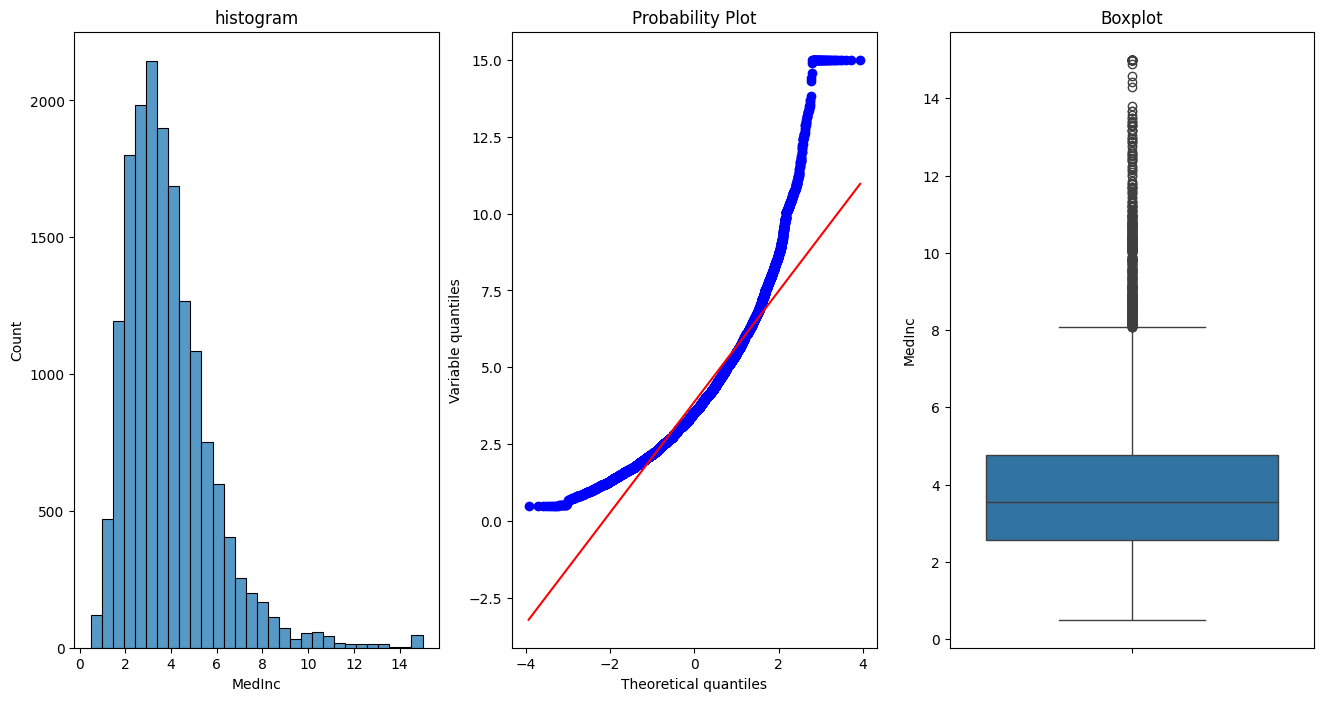

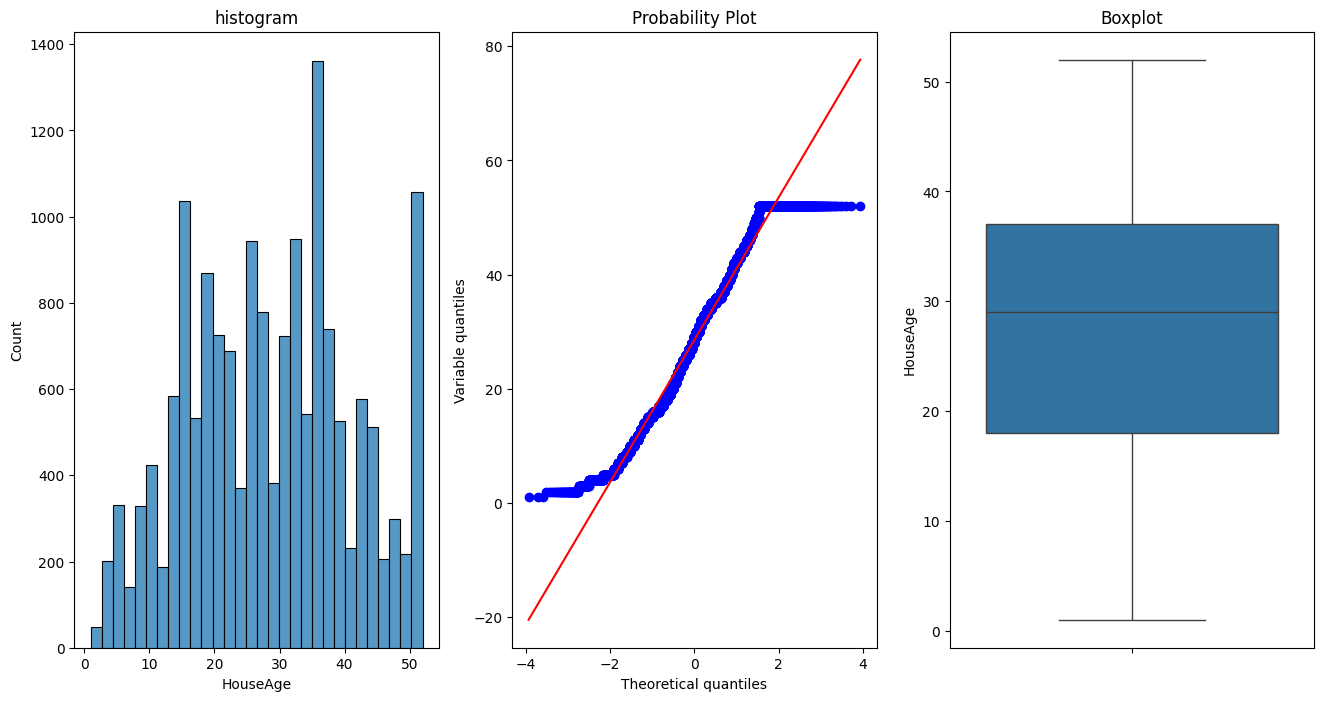

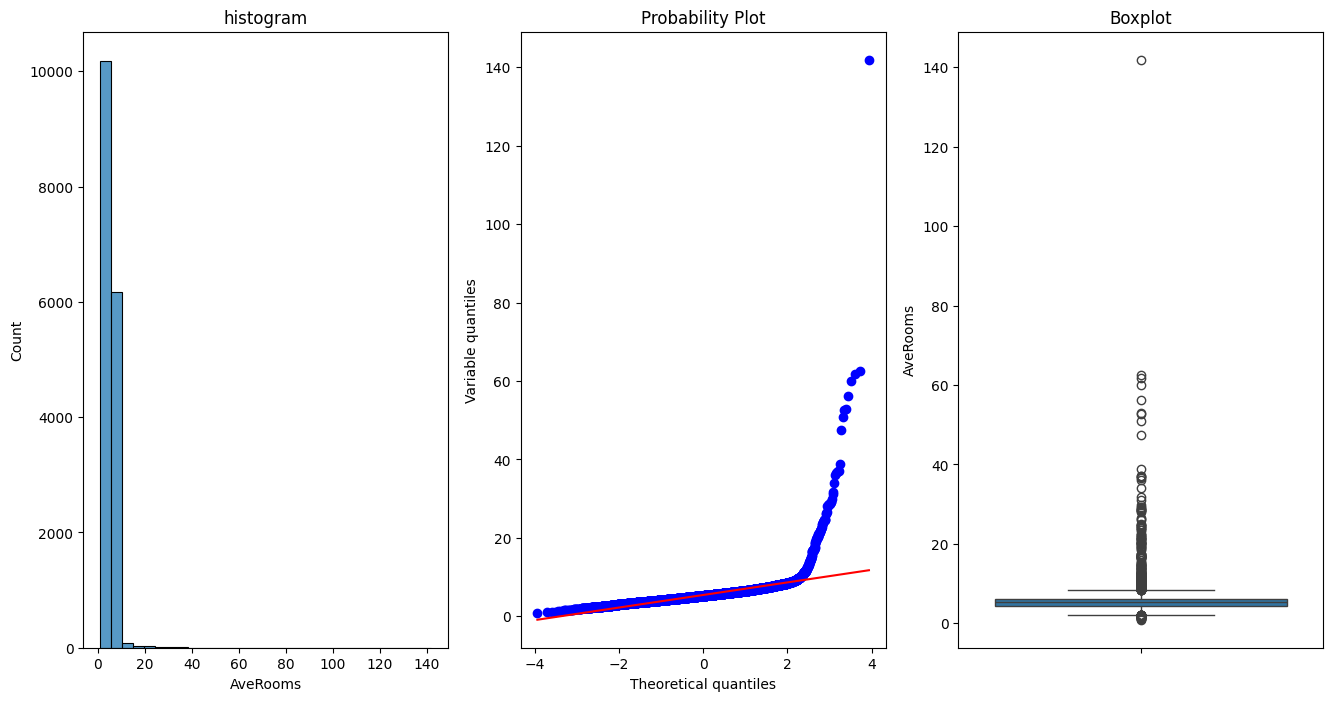

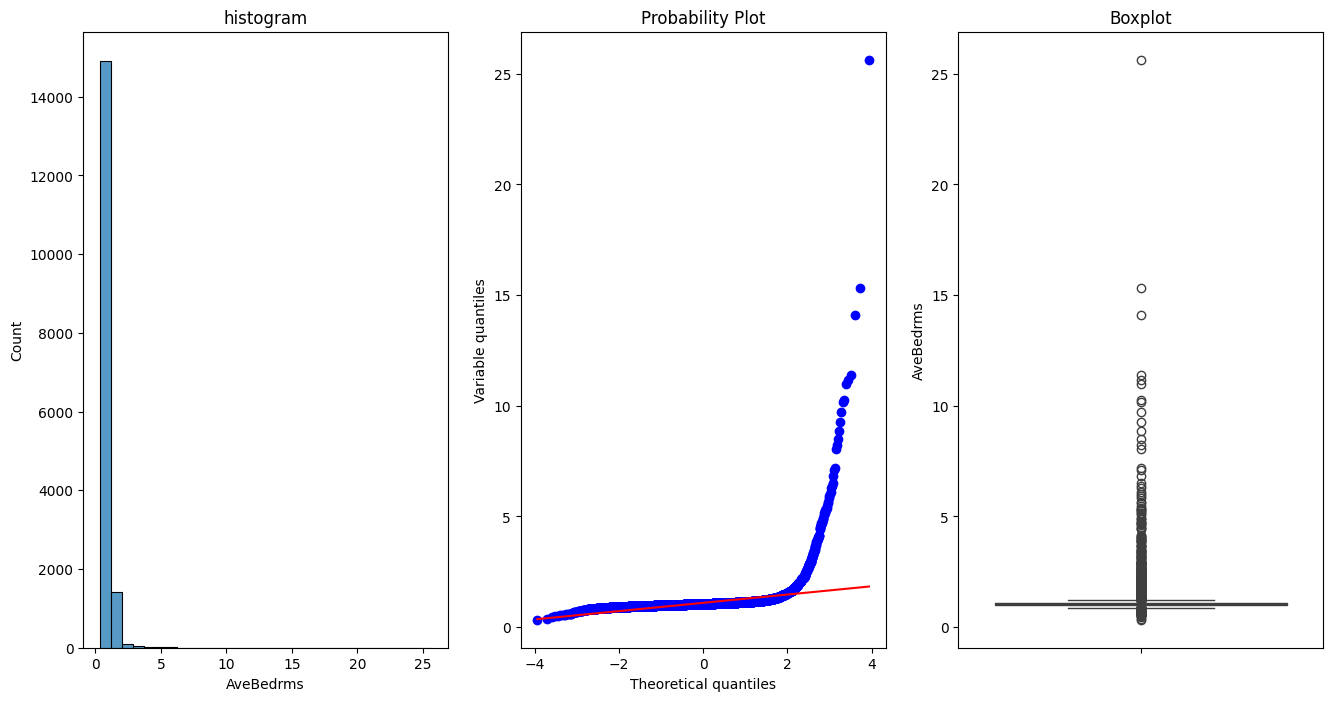

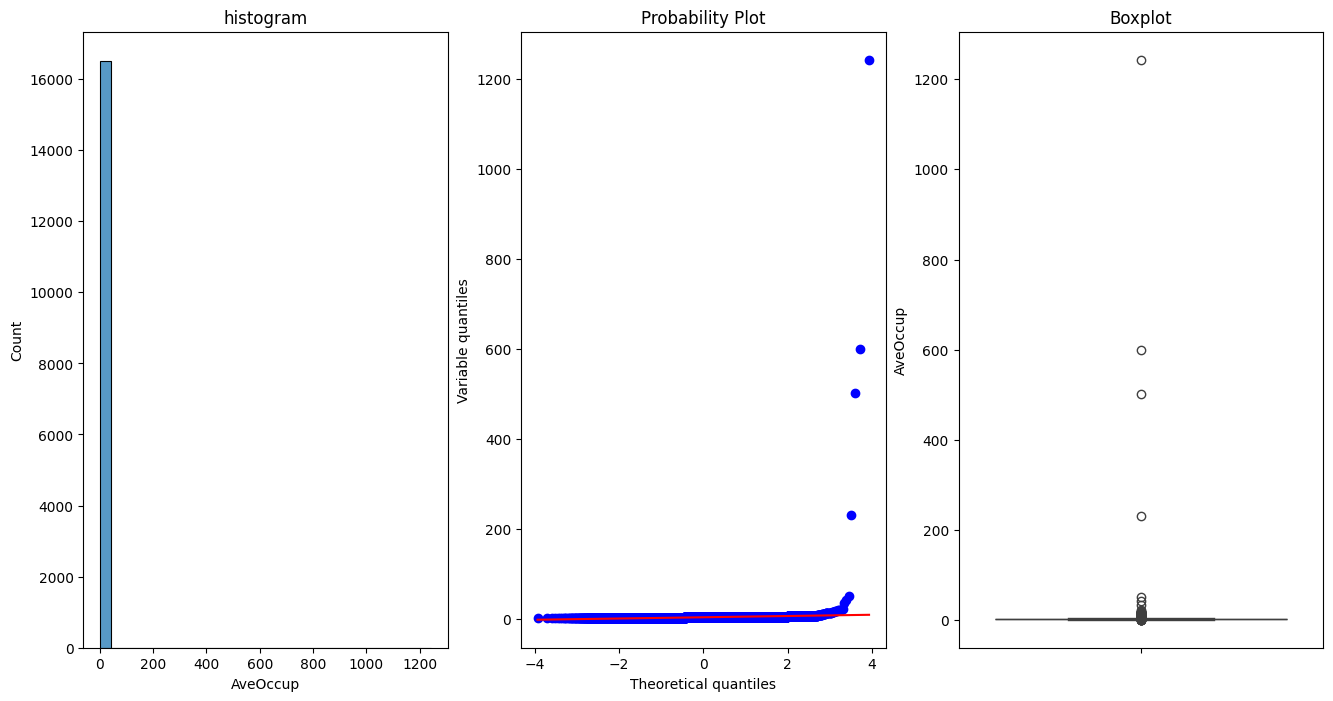

In [85]:
kolom_kolom = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup']
for i in kolom_kolom:
  check_plot(train_clfr, i)

Berdasarkan output yang dihasilkan dapat di lihat pada boxplot terdapat kolom yang memiliki data outlier yakni kolom AveRooms, AveBedrms, dan AveOccup dimana pada kolom AveRooms memiliki 1 data outlier, kolom AveBedrms memiliki 3 data outlier dengan ada 2 data yang mengikuti pola sebelumnya namun jarak yang jauh sedangkan 1 data memiliki jarak yang sangat jauh. Untuk kolom AveOccup memiliki 4 data outlier

Berdasarkan output setiap kolom memiliki distribusi yang berbeda-beda yakni :

1. medlinc : Grafik histogram menunjukkan bahwa distribusi MedInc cenderung miring ke kanan yang artinya  lebih banyak data dengan nilai lebih kecil
2. HouseAge : Grafik histogram menunujukkan bahwa  distribusi data cukup merata dengan beberapa puncak di usia tertentu. Ada banyak rumah dengan usia sekitar 50 tahun yang artinya banyak perumahan yang sudah tua
3. Averooms : Grafik histogram menunujukkan bahwa  distribusi data condong ke kanan yang artinya sebagian besar rumah memiliki jumlah kamar yang kecil tetapi ada beberapa rumah dengan jumlah kamar yang jauh lebih tinggi (outlier)
4. AveBedrms : Grafik histogram menunujukkan bahwa  distribusi data condong ke kanan dan beradasarkan probibilty plot banyak titik-titik menyimpang dari garis merah yang menunjukkan banyak data outlier
5. AveOccup : Grafik histogram menunujukkan bahwa  distribusi data condong ke kanan dan beradasarkan probibilty plot banyak titik-titik menyimpang dari garis merah yang menunjukkan banyak data outlier



## 1D). HANDLING OUTLIER DENGAN IQR PADA KOLOM YANG TERDETEKSI OUTLIER (KOLOM AveRooms, KOLOM AveBedrms dan Kolom AveOccup)

In [86]:
def find_outlier_boundary(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

Untuk handling outlier menggunakan IQR di sini saya harus menghitung batas maksimal dan batas minimal terlebih dahulu,jika data yang melebihi batas tersebut di anggap outlier

*KOLOM AveRooms*

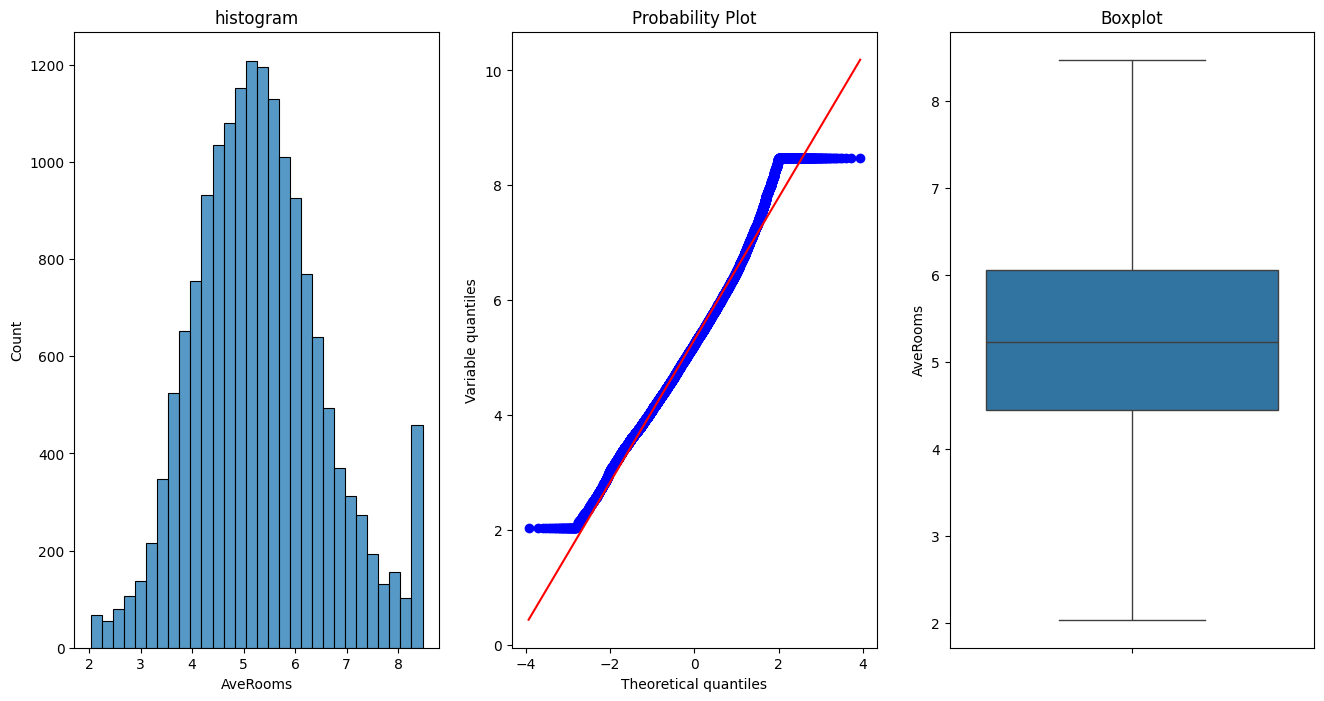

In [87]:
AveRooms_upper_limit, AveRooms_lower_limit = find_outlier_boundary(train_clfr, 'AveRooms')
train_clfr['AveRooms']= np.where(train_clfr['AveRooms'] > AveRooms_upper_limit, AveRooms_upper_limit,
                       np.where(train_clfr['AveRooms'] < AveRooms_lower_limit, AveRooms_lower_limit, train_clfr['AveRooms']))

check_plot(train_clfr, 'AveRooms')

Pada tahap ini saya menampilkan hasil handling outlier dengan menggunakan metode IQR, didapatkan hasil bahwa bentuk histogram sudah berdistribusi normal dan nilai ekstrem sudah lebih sedikit di bandingkan sebelumnya

*KOLOM AveBedrms*

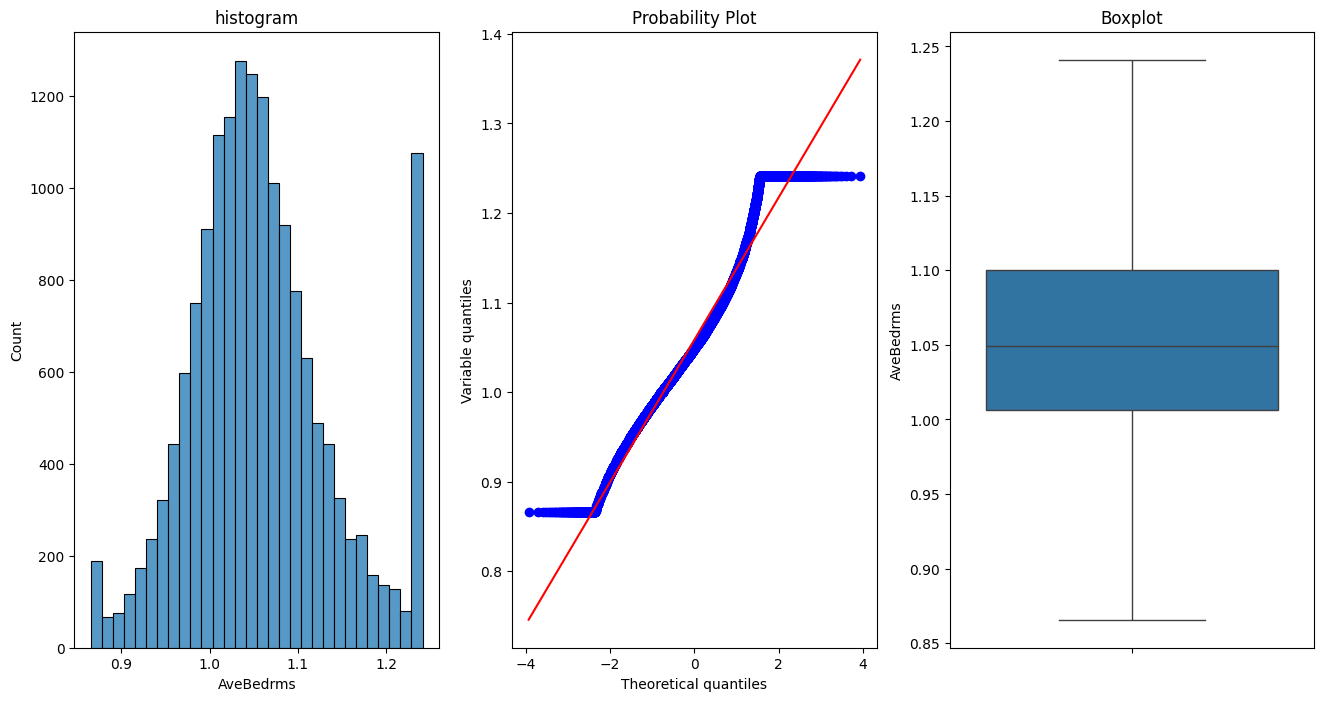

In [88]:
AveBedrms_upper_limit, AveBedrms_lower_limit = find_outlier_boundary(train_clfr, 'AveBedrms')
train_clfr['AveBedrms']= np.where(train_clfr['AveBedrms'] > AveBedrms_upper_limit, AveBedrms_upper_limit,
                       np.where(train_clfr['AveBedrms'] < AveBedrms_lower_limit, AveBedrms_lower_limit, train_clfr['AveBedrms']))
check_plot(train_clfr, 'AveBedrms')

Pada tahap ini saya menampilkan hasil handling outlier dengan menggunakan metode IQR, didapatkan hasil bahwa bentuk histogram sudah berdistribusi normal dan mayoritas berada di antara 0.9 hingga 1.2 dengan nilai median sekitar 1.05 dan pada boxplot sudah tidak terlihat data outlier

*KOLOM AveOccup*

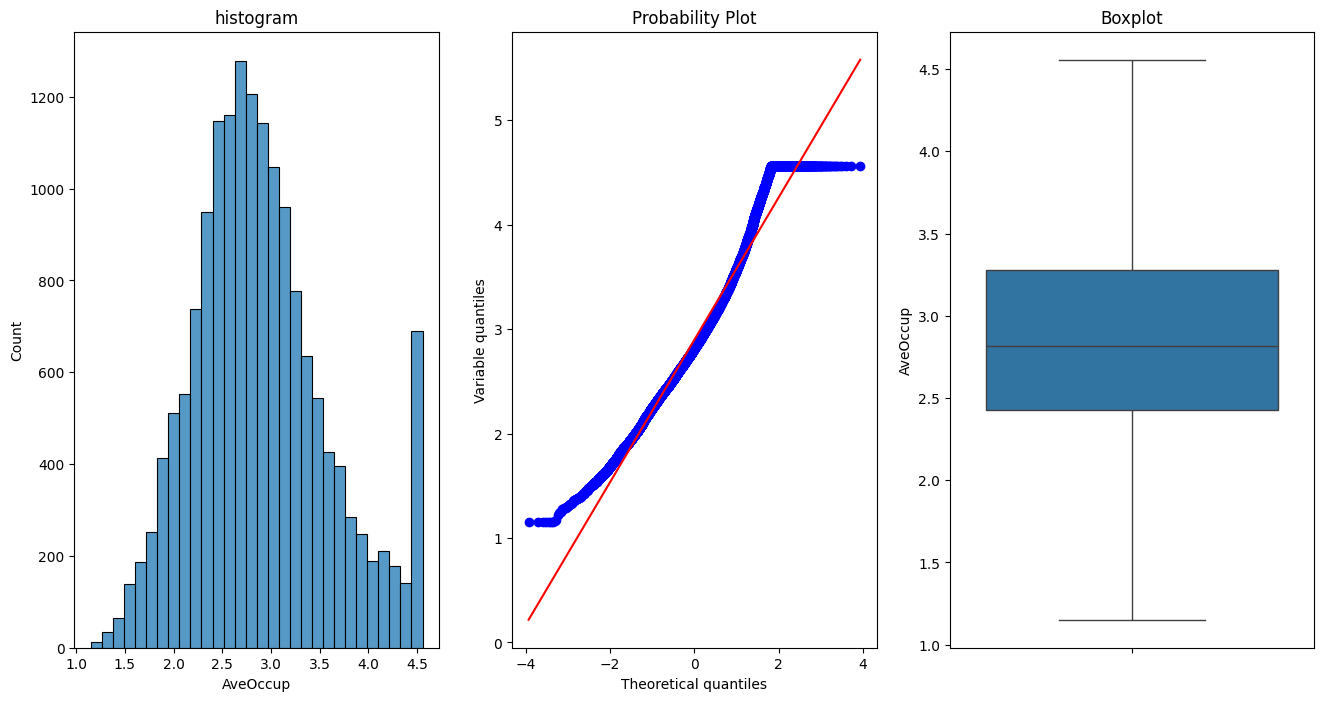

In [89]:
AveOccup_upper_limit, AveOccup_lower_limit = find_outlier_boundary(train_clfr, 'AveOccup')
train_clfr['AveOccup']= np.where(train_clfr['AveOccup'] > AveOccup_upper_limit, AveOccup_upper_limit,
                       np.where(train_clfr['AveOccup'] < AveOccup_lower_limit, AveOccup_lower_limit, train_clfr['AveOccup']))
check_plot(train_clfr, 'AveOccup')

Pada tahap ini saya menampilkan hasil handling outlier dengan menggunakan metode IQR, didapatkan hasil bahwa bentuk histogram sudah berdistribusi normal dan mayoritas berada di antara 2 hingga 3.5 dengan nilai median sekitar 2.8 - 3 dan pada boxplot sudah tidak terlihat data outlier

## SOAL NOMOR 2

## 2A). SPLITTING DATASET

In [90]:
df_company = pd.read_csv('company.csv')
df_company.head()

,Revenue,Size,Rating,Headquarters
0,Unknown / Non-Applicable,1001 to 5000 employees,3.1,"New York, NY"
1,$1 to $2 billion (USD),5001 to 10000 employees,4.2,"Herndon, VA"
2,$100 to $500 million (USD),1001 to 5000 employees,3.8,"Boston, MA"
3,$100 to $500 million (USD),501 to 1000 employees,3.5,"Bad Ragaz, Switzerland"
4,Unknown / Non-Applicable,51 to 200 employees,2.9,"New York, NY"


In [91]:
df_company.isna().sum()

Revenue         0
Size            0
Rating          0
Headquarters    0
dtype: int64

Pada tahap ini saya menampilkan apakah ada data yang bernilai kosong dan didapatkan output bahwa tidak ada data yang bernilai kosong atau na

In [92]:
for column in df_company.columns:
    print(f"============= {column} =================")
    display(df_company[column].value_counts())
    print()

============= Revenue =================


Revenue
Unknown / Non-Applicable            213
$100 to $500 million (USD)           94
$10+ billion (USD)                   63
$2 to $5 billion (USD)               45
$10 to $25 million (USD)             41
$1 to $2 billion (USD)               36
$25 to $50 million (USD)             36
$50 to $100 million (USD)            31
$1 to $5 million (USD)               31
-1                                   27
$500 million to $1 billion (USD)     19
$5 to $10 million (USD)              14
Less than $1 million (USD)           14
$5 to $10 billion (USD)               8
Name: count, dtype: int64


============= Size =================


Size
51 to 200 employees        135
1001 to 5000 employees     104
1 to 50 employees           86
201 to 500 employees        85
10000+ employees            80
501 to 1000 employees       77
5001 to 10000 employees     61
-1                          27
Unknown                     17
Name: count, dtype: int64


============= Rating =================


Rating
 3.5    58
-1.0    50
 4.0    41
 3.3    41
 3.9    40
 3.8    39
 3.7    38
 5.0    36
 4.5    32
 3.6    31
 3.4    31
 4.2    29
 4.1    25
 4.4    24
 4.7    22
 3.2    21
 4.8    20
 4.3    14
 2.9    14
 4.6    12
 3.1    12
 4.9    11
 2.7    10
 3.0     7
 2.6     4
 2.8     3
 2.5     2
 2.2     1
 2.4     1
 2.3     1
 2.1     1
 2.0     1
Name: count, dtype: int64


============= Headquarters =================


Headquarters
New York, NY         33
-1                   31
San Francisco, CA    31
Chicago, IL          23
Boston, MA           19
                     ..
Irving, TX            1
Scottsdale, AZ        1
Greensboro, NC        1
Newark, CA            1
Fort Lee, NJ          1
Name: count, Length: 229, dtype: int64

In [93]:
# from sklearn.model_selection import train_test_splits

train_company, test_company = train_test_split(df_company, test_size= 0.2, random_state=42)


Pada tahap ini dilakukan splitting data, di sini saya membaginya 20% data tes dan 80% lainya untuk data train

*2B). Cek presentase missing value kolom Headquaters*

In [94]:
def check_missing_percentage(df, label):
    missing_count = df["Headquarters"].eq("-1").sum()
    missing_percentage = (missing_count / len(df)) * 100
    print(f"Persentase missing value di kolom Headquarters {label}: {missing_percentage:.2f}%")

# Mengecek persentase missing value pada kolom Headquarters data train dan test
for dataset, label in zip([train_company, test_company], ["data train", "data test"]):
    check_missing_percentage(dataset, label)

Persentase missing value di kolom Headquarters data train: 4.47%
Persentase missing value di kolom Headquarters data test: 5.19%


missing values pada kolom headquaters yang didapatkan yakni hanya 4.47% pada data train dan 5.19% di data test, karena nilai ini tidak melebihi 20% maka kolom ini tidak akan di drop melainkan akan dilakukan handling missing value

*2C). HANDLING MISSING VALUE KOLOM HEADQUATERS*

In [95]:
train_mode_Headquaters = train_company[~train_company['Headquarters'].isin(['-1'])]['Headquarters'].mode()[0]
train_mode_Headquaters

'New York, NY'

Melakukan handling missing values. Pada kolom headquaters bukan kolom numerik melainkan kolom beriiskan data teks, maka di sini saya handling outlier dengan menggunakan modus

In [96]:
train_company['Headquarters'] = train_company['Headquarters'].apply(lambda x: train_mode_Headquaters if x in ['-1'] else x)
test_company['Headquarters'] = test_company['Headquarters'].apply(lambda x: train_mode_Headquaters if x in ['-1'] else x)

Pada tahap diatas ini kita akan mengisi nilai hilang atau yang tidak valid ke dalam kolom headquarters dalam dataset train_company dan test_company dengan nilai modus dari data train

## NOMOR 3 

In [97]:
df_churn = pd.read_csv('Telco-Customer-Churn.csv')
df_churn['Churn'] = df_churn['Churn'].replace({'Yes': 1, 'No': 0})
df_churn.head()

C:\Users\nimaa\AppData\Local\Temp\ipykernel_5176\1901417580.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_churn['Churn'] = df_churn['Churn'].replace({'Yes': 1, 'No': 0})


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Pada tahap ini saya mengganti data yang berisikan kata yes menjadi 1 dan no menjadi 0 pada kolom churn karena pada analisis lanjutan saya menggunakan kolom churn untuk handling value pada soal 3E, karena untuk mean encoding data yang digunakan harus berupa numerik

In [98]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


saya menampilkan informasi data, berdasarkan output diatas yang dihasilkan tidak ada yang null

In [99]:
custom_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines',
                  'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection'
                  ,'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
for column in custom_columns:
    print(f"============= {column} =================")
    display(df_churn[column].value_counts())
    print()

============= gender =================


gender
Male      3555
Female    3488
Name: count, dtype: int64


============= Partner =================


Partner
No     3641
Yes    3402
Name: count, dtype: int64


============= Dependents =================


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


============= PhoneService =================


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


============= MultipleLines =================


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


============= InternetService =================


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


============= OnlineSecurity =================


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


============= OnlineBackup =================


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


============= DeviceProtection =================


DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


============= TechSupport =================


TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


============= StreamingTV =================


StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


============= StreamingMovies =================


StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


============= Contract =================


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


============= PaperlessBilling =================


PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


============= PaymentMethod =================


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


============= Churn =================


Churn
0    5174
1    1869
Name: count, dtype: int64

Pada tahap ini saya menampilkan isi data pada setiap kolom, untuk merincikan isi dari setiap kolom,didapatkan bahwa ada beberapa kolom yang memiliki 3 kategori selain kategori yes dan no melainkan kategori lain ini memiliki makna yang sama dengan makna kategori no. Kolom ini yakni terdiri dari kolom :
1. StreamingMovies 
No = 2785
Yes = 2732
No internet service = 1526

2. StreamingTV
No = 2810
Yes = 2707
No internet service = 1526

3. Techsupport
No = 3473
Yes = 2044
No internet service = 1526

4. DeviceProtection 
No = 3095
Yes = 2422
No internet service = 1526

5. OnlineBackup
No = 3088
Yes = 2429
No internet service = 1526

6. OnlineSecurity
No = 3498
Yes = 2019
No internet service = 1526

7. MultipleLines
No                  3390
Yes                 2971
No phone service     682

## 3B). MEMILIH KOLOM StreamingMovies, StreamingTV, TechSupport,DeviceProtection, OnlineBackup, OnlineSecurity, MultipleLines untuk dilakukan standarisasi

In [100]:
df_churn['StreamingMovies'] = df_churn['StreamingMovies'].replace({'No internet service':'No'})
df_churn['StreamingTV'] = df_churn['StreamingTV'].replace({'No internet service':'No'})
df_churn['TechSupport'] = df_churn['TechSupport'].replace({'No internet service':'No'})
df_churn['DeviceProtection'] = df_churn['DeviceProtection'].replace({'No internet service':'No'})
df_churn['OnlineBackup'] = df_churn['OnlineBackup'].replace({'No internet service':'No'})
df_churn['OnlineSecurity'] = df_churn['OnlineSecurity'].replace({'No internet service':'No'})
df_churn['MultipleLines'] = df_churn['MultipleLines'].replace({'No phone service':'No'})

Karena 7 kolom tersebut memiliki nilai selain yes dan no namun nilai lainya memiliki makna yang serupa dengan no. Sebelum dilakukan perubahan di sini saya melakukan standarisasi dengan merubah kategori lain selain no tapi memiliki makna yang sama dengan no di rubah menjadi no

In [101]:
for column in custom_columns:
    print(f"============= {column} =================")
    display(df_churn[column].value_counts())
    print()

============= gender =================


gender
Male      3555
Female    3488
Name: count, dtype: int64


============= Partner =================


Partner
No     3641
Yes    3402
Name: count, dtype: int64


============= Dependents =================


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


============= PhoneService =================


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


============= MultipleLines =================


MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64


============= InternetService =================


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


============= OnlineSecurity =================


OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64


============= OnlineBackup =================


OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64


============= DeviceProtection =================


DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64


============= TechSupport =================


TechSupport
No     4999
Yes    2044
Name: count, dtype: int64


============= StreamingTV =================


StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64


============= StreamingMovies =================


StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64


============= Contract =================


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


============= PaperlessBilling =================


PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


============= PaymentMethod =================


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


============= Churn =================


Churn
0    5174
1    1869
Name: count, dtype: int64

Setelah nilai dirubah sesuai dengan artinya yakni mengganti kategori selain no yang memiliki makna sama dengan no menjadi no, dapat dilihat bahwa kategori nya sudah berubah pada kolom StreamingMovies,StreamingTV, TechSupport, DeviceProtection.OnlineBackup, OnlineSecurity, dan MultipleLines sudah memiliki 2 nilai saja yakni yes dan no

In [102]:
train_churn, test_churn = train_test_split(df_churn, test_size = 0.2, random_state = 42)

selanjutnya dilakukan splitting data sebelum melanjutkan ke encoder selanjutnya, di sini saya membaginya mnejadi 20% data tes dan 80% data train

## 3A). Lakukan label encoder pada 'Partner', 'Dependents'

In [103]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['Partner', 'Dependents']
label_encoder = LabelEncoder()

Pada tahap ini dilakukan label encoder pada kolom partner dan dependents

In [104]:
#LABEL ENCODING DATA TRAIN
for col in columns_to_encode:
    train_churn[col] = label_encoder.fit_transform(train_churn[col])

Pada tahap ini dilakukan penerapan label encoding pada data train

In [105]:
#LABEL ENCODING DATA TES
for col in columns_to_encode:
    test_churn[col] = label_encoder.transform(test_churn[col])

selain pada data train, di sini juga mengalami label encoding pada data tes agar tidak terjadi data leakage

In [106]:
train_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2142,4223-BKEOR,Female,0,0,1,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,0
1623,6035-RIIOM,Female,0,0,0,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0
6074,3797-VTIDR,Male,0,1,0,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,1
1362,2568-BRGYX,Male,0,0,0,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,1
6754,2775-SEFEE,Male,0,0,1,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,0


Pada tahap ini saya menampilkan data train yang telah dilakukan label encoding

In [107]:
test_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,1,0,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,1
2715,0484-JPBRU,Male,0,0,0,41,Yes,Yes,No,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,0
3825,3620-EHIMZ,Female,0,1,1,52,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,19.35,1031.7,0
1807,6910-HADCM,Female,0,0,0,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,1
132,8587-XYZSF,Male,0,0,0,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,0


Pada tahap ini saya menampilkan data tes yang telah dilakukan label encoding

## 3B). Pilih kolom-kolom StreamingMovies, StreamingTV, TechSupport,DeviceProtection, OnlineBackup, OnlineSecurity, MultipleLines

In [108]:

from sklearn.preprocessing import LabelEncoder
cols_to_encode = ['StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'MultipleLines']


## 3C). Ganti nilai yang tidak sesuai : No internet service menjadi No lalu validasi dengan value_counts

In [109]:
for col in cols_to_encode:
  train_churn[col] = train_churn[col].replace('No internet service', 'No')
  test_churn[col] = test_churn[col].replace('No internet service', 'No')

Pada tahap ini saya mengganti no internet service menjadi no, kemudian divalidasi dengan value_count

In [110]:
#VALIDASI DENGAN VALUE_COUNTS
for col in cols_to_encode:
  print(f"============= {col} =================")
  print(train_churn[col].value_counts())
  print()

============= StreamingMovies =================
StreamingMovies
No     3437
Yes    2197
Name: count, dtype: int64

============= StreamingTV =================
StreamingTV
No     3453
Yes    2181
Name: count, dtype: int64

============= TechSupport =================
TechSupport
No     4005
Yes    1629
Name: count, dtype: int64

============= DeviceProtection =================
DeviceProtection
No     3703
Yes    1931
Name: count, dtype: int64

============= OnlineBackup =================
OnlineBackup
No     3662
Yes    1972
Name: count, dtype: int64

============= OnlineSecurity =================
OnlineSecurity
No     4024
Yes    1610
Name: count, dtype: int64

============= MultipleLines =================
MultipleLines
No     3237
Yes    2397
Name: count, dtype: int64



Setelah menggant nilai yang tidak sesuai, di sini saya memvalidasi dengan value_count untuk melihat apakah sudah perubahan atau tidak. Dan berdasarkan output yang dihasilkan didapatkan sudah mengalami perubahan

## 3D). LABEL ENCODER

In [111]:
le = LabelEncoder()
for col in cols_to_encode:
  train_churn[col] = le.fit_transform(train_churn[col])
  test_churn[col] = le.transform(test_churn[col])

Pada tahap ini saya melakukan label encoder pada data train dan data tes yang telah dipisahkan

In [112]:
train_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2142,4223-BKEOR,Female,0,0,1,21,Yes,0,DSL,1,...,1,0,0,1,One year,No,Mailed check,64.85,1336.8,0
1623,6035-RIIOM,Female,0,0,0,54,Yes,1,Fiber optic,0,...,0,0,1,1,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0
6074,3797-VTIDR,Male,0,1,0,1,No,0,DSL,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,23.45,23.45,1
1362,2568-BRGYX,Male,0,0,0,4,Yes,0,Fiber optic,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.20,237.95,1
6754,2775-SEFEE,Male,0,0,1,0,Yes,1,DSL,1,...,0,1,0,0,Two year,Yes,Bank transfer (automatic),61.90,,0


berikut adalah hasil label encoder pada data train

In [113]:
test_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,1,0,1,No,0,DSL,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,24.80,24.8,1
2715,0484-JPBRU,Male,0,0,0,41,Yes,1,No,0,...,0,0,0,0,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,0
3825,3620-EHIMZ,Female,0,1,1,52,Yes,0,No,0,...,0,0,0,0,Two year,No,Mailed check,19.35,1031.7,0
1807,6910-HADCM,Female,0,0,0,1,Yes,0,Fiber optic,0,...,1,0,0,0,Month-to-month,No,Electronic check,76.35,76.35,1
132,8587-XYZSF,Male,0,0,0,67,Yes,0,DSL,0,...,0,1,0,0,Two year,No,Bank transfer (automatic),50.55,3260.1,0


berikut adalah hasil label encoder pada data tes

## 3E) MEAN CODING PADA INTERNET SERVICE

In [114]:
dict_inetServ = train_churn.groupby('InternetService')['Churn'].mean().to_dict()
dict_inetServ

{'DSL': 0.1918514698298092,
 'Fiber optic': 0.41555824264409513,
 'No': 0.07660626029654036}

Karena kolom ini berisikan teks maka dilakukan mean encoding dimana didapatkan hasil :
1. DSL memmilki rata rata sebesar 19%, yang berarti sekitar  19% dari customer dengan kategori churn
2. Fiber optic memiliki rata rata sebesar 41.5% yang berarti sekitar  19% dari customer dengan kategori churn
3. No memiliki rata rata sebesar 7.6% yang berarti sekitar  19% dari customer dengan kategori churn

In [115]:
train_churn['InternetService'] = train_churn['InternetService'].map(dict_inetServ)
test_churn['InternetService'] = test_churn['InternetService'].map(dict_inetServ)

Mean encoding ini diterapkan pada data test dan data train

In [116]:
train_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2142,4223-BKEOR,Female,0,0,1,21,Yes,0,0.191851,1,...,1,0,0,1,One year,No,Mailed check,64.85,1336.8,0
1623,6035-RIIOM,Female,0,0,0,54,Yes,1,0.415558,0,...,0,0,1,1,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0
6074,3797-VTIDR,Male,0,1,0,1,No,0,0.191851,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,23.45,23.45,1
1362,2568-BRGYX,Male,0,0,0,4,Yes,0,0.415558,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.20,237.95,1
6754,2775-SEFEE,Male,0,0,1,0,Yes,1,0.191851,1,...,0,1,0,0,Two year,Yes,Bank transfer (automatic),61.90,,0


output di atas ini merupakan hasil mean coding pada data train

In [117]:
test_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,1,0,1,No,0,0.191851,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,24.80,24.8,1
2715,0484-JPBRU,Male,0,0,0,41,Yes,1,0.076606,0,...,0,0,0,0,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,0
3825,3620-EHIMZ,Female,0,1,1,52,Yes,0,0.076606,0,...,0,0,0,0,Two year,No,Mailed check,19.35,1031.7,0
1807,6910-HADCM,Female,0,0,0,1,Yes,0,0.415558,0,...,1,0,0,0,Month-to-month,No,Electronic check,76.35,76.35,1
132,8587-XYZSF,Male,0,0,0,67,Yes,0,0.191851,0,...,0,1,0,0,Two year,No,Bank transfer (automatic),50.55,3260.1,0


output di atas ini merupakan hasil mean coding pada data tes

## SOAL NOMOR 4

## 4A). MENGGANTI NILAI YANG TIDAK VALID (KOSONG ATAU SPASI) MENJADI NaN

In [118]:
count_nan = df_churn['TotalCharges'].isnull().sum()

In [119]:
# Menghitung jumlah nilai yang kosong atau hanya berisi spasi pada kolom TotalCharges
count_invalid = df_churn['TotalCharges'].apply(lambda x: x.strip() == '' if isinstance(x, str) else False).sum()

# Menampilkan hasil
print(f"total nilai kosong atau hanya berisi spasi pada kolom 'TotalCharges': {count_invalid}")

total nilai kosong atau hanya berisi spasi pada kolom 'TotalCharges': 11


Pada tahap ini saya menampilkan nilai yang kosong atau hanya berisi spasi pada kolom total charges dan didapatkan bahwa ada 11 data yang kosong atau hanya berisi spasi

In [120]:
# Mengecek dan mengganti nilai kosong atau spasi pada kolom TotalCharges dengan NaN
df_churn['TotalCharges'] = df_churn['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)

# Menghitung jumlah nilai yang kosong atau hanya berisi spasi pada kolom TotalCharges
count_invalid = df_churn['TotalCharges'].apply(lambda x: x.strip() == '' if isinstance(x, str) else False).sum()

# Menampilkan hasil
print(f"Jumlah nilai kosong atau hanya berisi spasi pada kolom 'TotalCharges': {count_invalid}")

# Menghitung jumlah nilai NaN pada kolom TotalCharges
count_nan = df_churn['TotalCharges'].isnull().sum()

# Menampilkan hasil
print(f"Jumlah nilai NaN: {count_nan}")

Jumlah nilai kosong atau hanya berisi spasi pada kolom 'TotalCharges': 0
Jumlah nilai NaN: 11


Pada tahap ini nilai kosong atau spasi diganti dengan NaN, kemudian di sini saya menampilkan jumlah nilai yang sudah di ganti menjadi NaN didapatkan ada 11 data yang telah dirubah menjadi 11

## 4B). MENGUBAH KOLOM MENJADI TIPE FLOAT DAN JUGA MENGGUNAKAN pd.to_numeric serta errors='coerce'

In [121]:
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')

Pada tahap ini dilakukan perubahan kolom menjadi  tipe float dan menggunakan pd.to_numeric dan menggunakan errors='coerce'. 

In [122]:
# mengubah tipe data kolom TotalCharges
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')

# menampilkan tipe data kolom TotalCharges
print(f"tipe data 'TotalCharges': {df_churn['TotalCharges'].dtype}")

tipe data 'TotalCharges': float64


Pada tahap ini saya memastikan lagi bahwa tipe data sudah berubah menjadi float dan di dapatkan hasil bahwa float yang artinya bahwa type data kolom Total Charges float

## 4C). MENGECEK APAKAH ADA MISSING VALUE <20%

In [123]:
# Menghitung persentase missing values pada kolom 'TotalCharges'
missing_percentage = df_churn['TotalCharges'].isna().mean() * 100

# Menampilkan hasil
print(f"persentase missing value pada kolom 'TotalCharges': {missing_percentage:.2f}%")

persentase missing value pada kolom 'TotalCharges': 0.16%


Pada tahap ini saya mengecek apakah ada missing value pada kolom total charges atau tidak. Dan berdasarkan output terdapat 0.16% mising value

## 4D). Mengisi nilai Nan dengan menggunakan metode median

In [124]:
if missing_percentage < 20:
    # Melakukan imputasi dengan median
    median_value = df_churn['TotalCharges'].median()
    df_churn['TotalCharges'] = df_churn['TotalCharges'].fillna(median_value)  # Menggunakan assignment langsung
    print(f"Imputasi dilakukan dengan median: {median_value}")
else:
    print(f"Persentase missing values pada kolom 'TotalCharges' lebih dari 20% ({missing_percentage:.2f}%)")

Imputasi dilakukan dengan median: 1397.475


Karena missing value ditemukan sebanyak 0.16 dan masih di bawah 20% di sini saya mengimputasi dengan menggunakan metode median

## 4E). MEMERIKSA APAKAH ADA NILAI NAN YANG TERSISA

In [125]:
# Menghitung jumlah nilai NaN pada kolom TotalCharges
count_nan = df_churn['TotalCharges'].isnull().sum()

# Menampilkan hasil
print(f"Jumlah nilai NaN: {count_nan}")

Jumlah nilai NaN: 0


Setelah menghandling missing value dan mengimputasi dengan median di sini saya memastikan bahwa sudah tidak ada data yang NaN 

## 4F). STANDARSCALER

In [126]:
# Menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()
df_churn['TotalCharges_scaled'] = scaler_standard.fit_transform(df_churn[['TotalCharges']])

Disini saya melakukan standarisasi kolom total charges dengan menggunakan metode standarscaler

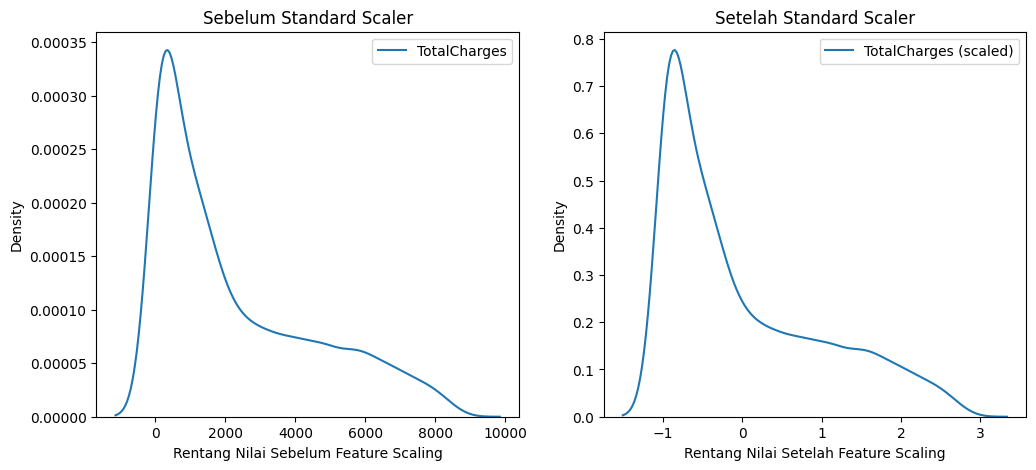

In [127]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# Plot distribusi sebelum Standard Scaler
ax1.set_title('Sebelum Standard Scaler')
sns.kdeplot(df_churn['TotalCharges'], ax=ax1, label='TotalCharges')
ax1.set_xlabel('Rentang Nilai Sebelum Feature Scaling')
ax1.legend()
# Plot distribusi setelah Standard Scaler
ax2.set_title('Setelah Standard Scaler')
sns.kdeplot(df_churn['TotalCharges_scaled'], ax=ax2, label='TotalCharges (scaled)')
ax2.set_xlabel('Rentang Nilai Setelah Feature Scaling')
ax2.legend()
plt.show()


Berikut hasil dari standarisasi dari standar scaler, didapatan bahwa :
1. Distribusi pada kolom totalcharges sebelum standarisasi memiliki rentang nilai yang sangat besar yakni dari 0 hingaa 10.000, selain itu distribusinya miring ke kanan y, dan memiliki nilai yang sangat bervariasi

2. Setelah dilakukan standarisasi dengan standar scaler rentang nilainya hanya berkisar anatara -1 hingga 3 walaupun bentuk distribusi masih sama 


*4F). MINMAXSCALLER*

In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_churn['TotalCharges_scaled'] = scaler.fit_transform(df_churn[['TotalCharges']])


Pada tahap ini saya menginisialisasi kolom mana yang akan saya lakukan standarisasi dan metode apa yang saya pakai, di sini saya menginisialisasi standarisasi dengan minmaxscaler.

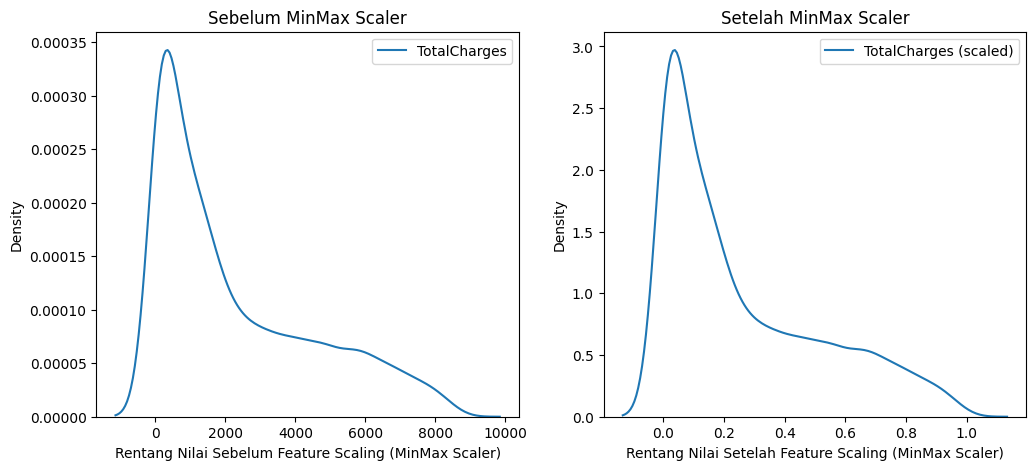

In [129]:
# Membuat visualisasi distribusi sebelum dan sesudah MinMax Scaler
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot distribusi sebelum MinMax Scaler
ax1.set_title('Sebelum MinMax Scaler')
sns.kdeplot(df_churn['TotalCharges'].dropna(), ax=ax1, label='TotalCharges')
ax1.set_xlabel('Rentang Nilai Sebelum Feature Scaling (MinMax Scaler)')
ax1.legend()

# Plot distribusi setelah MinMax Scaler
ax2.set_title('Setelah MinMax Scaler')
sns.kdeplot(df_churn['TotalCharges_scaled'].dropna(), ax=ax2, label='TotalCharges (scaled)')
ax2.set_xlabel('Rentang Nilai Setelah Feature Scaling (MinMax Scaler)')
ax2.legend()

plt.show()

Berikut hasil dari standarisasi dari minxmac scaler, didapatan bahwa :
1. Distribusi pada kolom totalcharges sebelum standarisasi memiliki rentang nilai yang sangat besar yakni dari 0 hingaa 10.000 dan distribusinya miring ke kanan y
2. Setelah menggunakan MinMax Scaler, nilai TotalCharges telah dinormalisasi dalam rentang 0 hingga 1 dan untuk distribusinya terlihat masih sama